In [106]:
import pickle
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import numpy as np

matplotlib.style.use("ggplot")

In [2]:
#
# Load the data from pickled class created in "dataset_parser"
#
data = pickle.load(open("dataset_alphabay.p","rb"))

In [3]:
#
# Display the attributes of the objects
#
data[0].keys()

dict_keys(['description', 'country', 'title', 'price', 'category', 'soldby'])

In [88]:
#
# get data - x and y
#
description = [x.get("description") for x in data]
category = [x.get("category").split("/")[0] for x in data]
category_subs = [x.get("category") for x in data]

# print(len(list(set(category_subs))))

59


In [5]:
#
# Numerical category representation
#
category_int = [list(set(category)).index(x) for x in category]

In [6]:
#
# count vectoriser - 
# Ret: matrix containing occurance of word in document 
#
# print(X_train_counts) 
#   (document, word_id, occurances)
#   (0, 5976)	2
#   (0, 15089)	1
#   (0, 7283)	1
#
count_vect = CountVectorizer(stop_words = 'english') # stopwords/max_df/min_df påverkar inte resultatet men påskyndar!
X_train_counts = count_vect.fit_transform(description)
X_train_counts.shape

(5583, 24394)

In [7]:
#
#
#
count_vect.vocabulary_.get(u'newspaper')

In [8]:
#
# count vectoriser - 
# Ret: matrix containing tf-idf representation
#
# print(X_train_tf) 
#   (document, word_id, freq.)
#   (0, 22411)	0.0866296163648
#   (0, 5976)	0.0866296163648
#   (0, 21638)	0.0433148081824
#
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5583, 24394)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)
clf = MultinomialNB().fit(X_train, y_train)
print("MultinomialNB (parent categories",clf.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category_subs)
clf = MultinomialNB().fit(X_train, y_train)
print("MultinomialNB (sub categories",clf.score(X_test, y_test))

# scores = cross_val_score(clf, X_train_tfidf, category_subs, cv=6)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MultinomialNB (parent categories 0.696275071633
MultinomialNB (sub categories 0.502148997135


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)
clf = SGDClassifier().fit(X_train, y_train)
print("SGDClassifier (parent categories",clf.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category_subs)
clf = SGDClassifier().fit(X_train, y_train)
print("SGDClassifier (sub categories",clf.score(X_test, y_test))

SGDClassifier (parent categories 0.811604584527
SGDClassifier (sub categories 0.714899713467


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)

clf =  sklearn.naive_bayes.BernoulliNB().fit(X_train, y_train)
print("NB - bernouli:",clf.score(X_test, y_test))

clf =  sklearn.naive_bayes.GaussianNB().fit(X_train.todense(), y_train)
print("NB - gaussian:",clf.score(X_test.todense(), y_test))

clf =  sklearn.naive_bayes.MultinomialNB().fit(X_train, y_train)
print("NB - multinom:",clf.score(X_test, y_test))

clf =  sklearn.svm.SVC().fit(X_train, y_train)
print("SVM - vanilla:",clf.score(X_test, y_test))

clf =  sklearn.svm.LinearSVC().fit(X_train, y_train)
print("SVM - linear:",clf.score(X_test, y_test))

clf = SGDClassifier().fit(X_train, y_train)
print("SGD - vanilla",clf.score(X_test, y_test))

clf = sklearn.linear_model.RidgeClassifier().fit(X_train, y_train)
print("SGD - ridgeC",clf.score(X_test, y_test))

NB - bernouli: 0.671919770774
NB - gaussian: 0.722063037249
NB - multinom: 0.702722063037
SVM - vanilla: 0.386103151862
SVM - linear: 0.815902578797
SGD - vanilla 0.820200573066
SGD - ridgeC 0.810888252149


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)

clf =  sklearn.naive_bayes.BernoulliNB().fit(X_train, y_train)
print("NB - bernouli:",clf.score(X_test, y_test))

clf =  sklearn.naive_bayes.GaussianNB().fit(X_train.todense(), y_train)
print("NB - gaussian:",clf.score(X_test.todense(), y_test))

clf =  sklearn.naive_bayes.MultinomialNB().fit(X_train, y_train)
print("NB - multinom:",clf.score(X_test, y_test))

clf =  sklearn.svm.SVC().fit(X_train, y_train)
print("SVM - vanilla:",clf.score(X_test, y_test))

clf =  sklearn.svm.LinearSVC().fit(X_train, y_train)
print("SVM - linear:",clf.score(X_test, y_test))

clf = SGDClassifier().fit(X_train, y_train)
print("SGD - vanilla",clf.score(X_test, y_test))

clf = sklearn.linear_model.RidgeClassifier().fit(X_train, y_train)
print("SGD - ridgeC",clf.score(X_test, y_test))

clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=len(list(set(y_train)))).fit(X_train, y_train)
print("KNN - vanilla:",clf.score(X_test, y_test))

NB - bernouli: 0.700573065903
NB - gaussian: 0.750716332378
NB - multinom: 0.71776504298
SVM - vanilla: 0.406876790831
SVM - linear: 0.844555873926
SGD - vanilla 0.853151862464
SGD - ridgeC 0.843123209169
KNN - vanilla: 0.803724928367


100%|██████████| 99/99 [00:21<00:00,  4.52it/s]


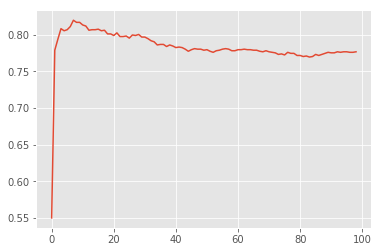

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)
ks = []
k = []

for x in tqdm(range(1,100)):
    clf = sklearn.neighbors.KNeighborsClassifier(x).fit(X_train, y_train)
    ks.append(clf.score(X_test, y_test))

plt.plot(ks)
plt.show()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, category)
import sklearn.cluster

clf = sklearn.cluster.AffinityPropagation().fit(X_train, y_train)

print(clf.fit_predict(X_test, y_test))

[  0 189 259 ..., 229   8  36]


In [159]:
# af = AffinityPropagation(preference=-50).fit(X)
from sklearn import metrics

af = clf
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels_true = y_test
X = X_test
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X.todense(), labels, metric='sqeuclidean'))

Estimated number of clusters: 272
Homogeneity: 0.732
Completeness: 0.218
V-measure: 0.336
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.235


In [160]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]